# Simple orders inspection


Here, I wanted to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [1]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=True)

/Users/victorvoneisenhart-rothe/code/Victorvone/data-context-and-setup/olist/order.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distances['distance_seller_customer'] = distances\


In [12]:
# Check your shape below
# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13: 
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
else:  
    assert(orders.shape == (96353, 12))
    
orders.shape

(95872, 13)

## 1 - Inspect features

In [5]:
from pandas_profiling import ProfileReport

print(orders.columns)
print(orders['wait_time'].describe())

Index(['order_id', 'order_status', 'wait_time', 'expected_wait_time',
       'delay_vs_expected', 'review_score', 'dim_is_five_star',
       'dim_is_one_star', 'number_of_products', 'number_of_sellers', 'price',
       'freight_value'],
      dtype='object')
count    96353.000000
mean        12.522869
std          9.457183
min          0.533414
25%          6.763530
50%         10.211944
75%         15.685278
max        208.351759
Name: wait_time, dtype: float64


(array([  335.,  4815., 10637., 24625., 22989.,  8866.,  5783.,  3140.,
         3098.,  2695.,  1460.,  1396.,  1065.,   830.,   704.,   602.,
          428.,   447.,   291.,   216.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.,
        52., 56., 60., 64., 68., 72., 76., 80.]),
 <BarContainer object of 20 artists>)

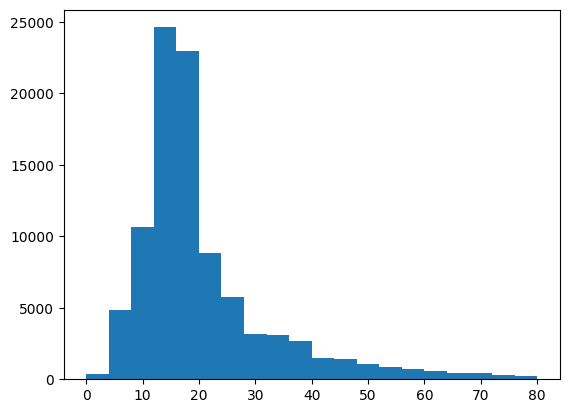

In [6]:
plt.hist(orders['freight_value'], bins = 20, range = (0, 80))

In [7]:
orders['wait_time'] = orders['wait_time'].round(decimals=0)
orders.head()

,order_id,order_status,wait_time,expected_wait_time,delay_vs_expected,review_score,dim_is_five_star,dim_is_one_star,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,8.0,15.544063,0.0,4,0,0,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,14.0,19.137766,0.0,4,0,0,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,9.0,26.639711,0.0,5,1,0,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,13.0,26.188819,0.0,5,1,0,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,3.0,12.112049,0.0,5,1,0,1,1,19.90,8.72


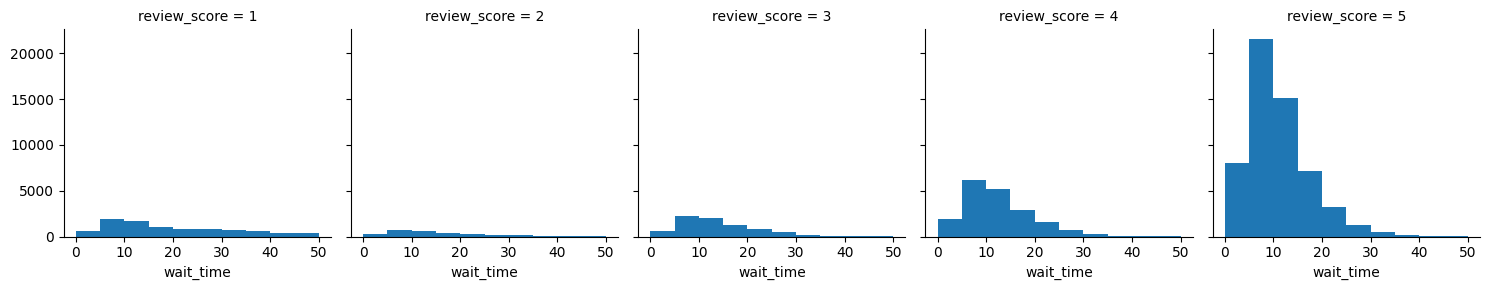

In [8]:
grid_wait = sns.FacetGrid(orders, col='review_score')
grid_wait.map_dataframe(plt.hist, x = 'wait_time', range = (0, 50))

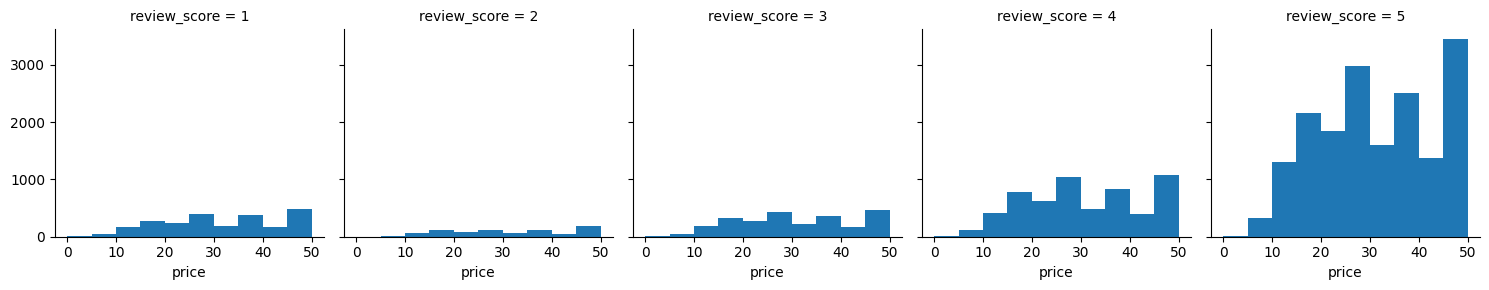

In [9]:
grid_price = sns.FacetGrid(orders, col='review_score')
grid_price.map_dataframe(plt.hist, x = 'price', range = (0, 50))

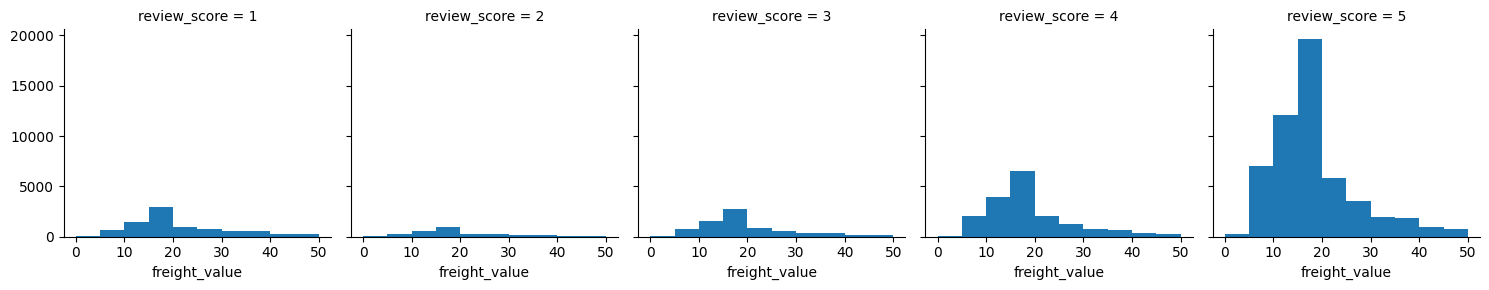

In [10]:
grid_freight_value= sns.FacetGrid(orders, col='review_score')
grid_freight_value.map_dataframe(plt.hist, x = 'freight_value', range = (0, 50))

<AxesSubplot:>

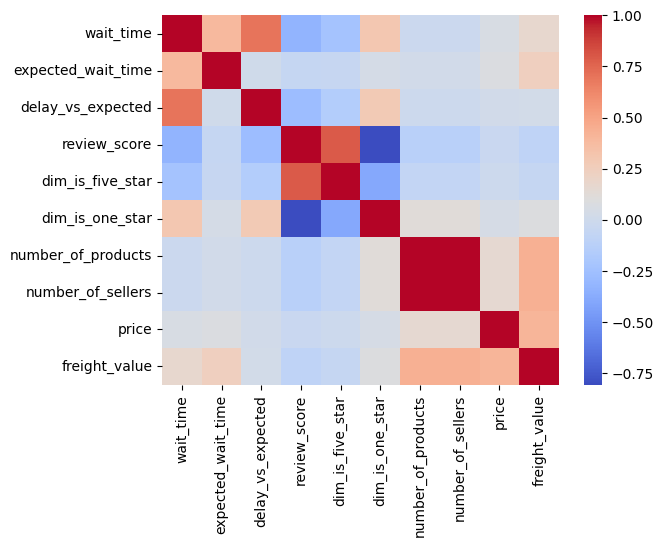

In [11]:
sns.heatmap(orders.corr(),cmap='coolwarm')

* The two highest non-obvious correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : 27 %